In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import random
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset.csv')
df.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Texture,Season,Rainfall,Avg.Temp,Crop
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,Sandy soil,Autumn,202.935536,20.879744,rice
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,Sandy soil,Summer,226.655537,21.770462,rice
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,Sandy soil,Summer,263.964248,23.004459,rice
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,Sandy soil,Autumn,242.864034,26.491096,rice
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,Sandy soil,Summer,262.717340,20.130175,rice


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 17 columns):
N           880 non-null int64
P           880 non-null float64
K           880 non-null int64
pH          880 non-null float64
EC          880 non-null float64
OC          880 non-null float64
S           880 non-null float64
Zn          880 non-null float64
Fe          880 non-null float64
Cu          880 non-null float64
Mn          880 non-null float64
B           880 non-null float64
Texture     880 non-null object
Season      880 non-null object
Rainfall    880 non-null float64
Avg.Temp    880 non-null float64
Crop        880 non-null object
dtypes: float64(12), int64(2), object(3)
memory usage: 117.0+ KB


In [5]:
df = df.dropna()

In [6]:
df['Texture'].value_counts()

Sandy Clay loam    274
Regur soil         155
Desert soils       113
Sandy loam         102
Desert soil         65
Laterite soil       61
Black soil          44
Red soil            43
Sandy soil          15
Clayey soils         5
Alluvial soil        3
Name: Texture, dtype: int64

In [7]:
df['Season'].value_counts()

Autumn    587
Summer    293
Name: Season, dtype: int64

In [8]:
df['Crop'].value_counts()

blackgram      100
maize          100
mungbean       100
pigeonpeas     100
kidneybeans    100
mothbeans      100
chickpea       100
rice           100
lentil          80
Name: Crop, dtype: int64

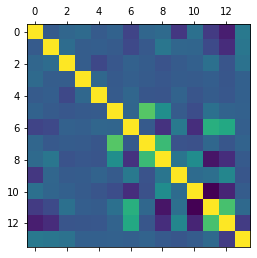

In [9]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

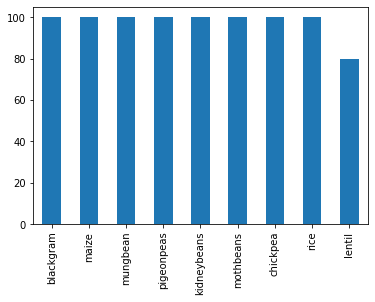

In [10]:
df.Crop.value_counts().plot(kind='bar');

In [12]:
# Data preprocessing
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['Texture']= label_encoder.fit_transform(df['Texture'])
df['Season']= label_encoder.fit_transform(df['Season'])
df['Crop']= label_encoder.fit_transform(df['Crop'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880 entries, 0 to 879
Data columns (total 17 columns):
N           880 non-null int64
P           880 non-null float64
K           880 non-null int64
pH          880 non-null float64
EC          880 non-null float64
OC          880 non-null float64
S           880 non-null float64
Zn          880 non-null float64
Fe          880 non-null float64
Cu          880 non-null float64
Mn          880 non-null float64
B           880 non-null float64
Texture     880 non-null int64
Season      880 non-null int64
Rainfall    880 non-null float64
Avg.Temp    880 non-null float64
Crop        880 non-null int64
dtypes: float64(12), int64(5)
memory usage: 123.8 KB


In [14]:
df.columns

Index(['N', 'P', 'K', 'pH', 'EC', 'OC', 'S', 'Zn', 'Fe', 'Cu', 'Mn', 'B',
       'Texture', 'Season', 'Rainfall', 'Avg.Temp', 'Crop'],
      dtype='object')

In [15]:
X = df[['N', 'P', 'K', 'pH', 'EC', 'OC', 'S', 'Zn', 'Fe', 'Cu', 'Mn', 'B',
       'Texture', 'Season', 'Rainfall', 'Avg.Temp',]]
y = df['Crop']

# MRFE

In [16]:
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

In [17]:
estimator = RandomForestClassifier()
rfecv = RFECV(estimator=estimator, cv=StratifiedKFold(3, random_state=0, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
      estimator=RandomForestClassifier(), scoring='accuracy')

In [18]:
#to get number of the features
display('Number of features:', rfecv.n_features_)

#to get feature names
list(X.columns[rfecv.support_]) 

'Number of features:'

12

['N',
 'P',
 'pH',
 'S',
 'Fe',
 'Cu',
 'Mn',
 'B',
 'Texture',
 'Season',
 'Rainfall',
 'Avg.Temp']

In [19]:
X_2 = df[['N',
             'P',
             'K',
             'pH',
             'S',
             'Fe',
             'Cu',
             'Mn',
             'B',
             'Texture',
             'Season',
             'Rainfall',
             'Avg.Temp']]

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((704, 13), (704,), (176, 13), (176,))

In [21]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
auc = []
mae = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    auc.append(round(e,3))
    mae.append(round(f,3))

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, log_loss

# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
# fit the model 
clf.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = clf.predict(X_test)

knn_acc = accuracy_score(y_pred, y_test)
knn_prec = precision_score(y_pred, y_test,average='weighted')
knn_rec = recall_score(y_pred, y_test,average='weighted')
knn_f1 = f1_score(y_pred, y_test,average='weighted')
knn_auc = roc_auc_score(y_train, clf.predict_proba(X_train), multi_class='ovr')
knn_mae = mean_absolute_error(y_pred, y_test, multioutput='raw_values')

In [24]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1,knn_auc,knn_mae[0])

# Naive Bayes

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
p_grid_NB = {'alpha': alphas, 'fit_prior' : [True, False]}

clf = MultinomialNB()

grid = GridSearchCV(estimator =clf, param_grid = p_grid_NB, scoring = 'roc_auc', cv = 5)

# fit the model 
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

nb_acc = accuracy_score(y_pred, y_test)
nb_prec = precision_score(y_pred, y_test,average='weighted')
nb_rec = recall_score(y_pred, y_test,average='weighted')
nb_f1 = f1_score(y_pred, y_test,average='weighted')
nb_auc = roc_auc_score(y_train, grid.predict_proba(X_train), multi_class='ovr')
nb_mae = mean_absolute_error(y_pred, y_test, multioutput='raw_values')

In [26]:
storeResults('Naive Bayes',nb_acc,nb_prec,nb_rec,nb_f1,nb_auc,nb_mae[0])

# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=10)
# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')
dt_auc = roc_auc_score(y_train, clf.predict_proba(X_train), multi_class='ovr')
dt_mae = mean_absolute_error(y_pred, y_test, multioutput='raw_values')

In [28]:
storeResults('DecisionTree',dt_acc,dt_prec,dt_rec,dt_f1,dt_auc,dt_mae[0])

# SVM

In [29]:
from sklearn.svm import SVC

clf = SVC(gamma='auto',probability=True)
# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

svm_acc = accuracy_score(y_pred, y_test)
svm_prec = precision_score(y_pred, y_test,average='weighted')
svm_rec = recall_score(y_pred, y_test,average='weighted')
svm_f1 = f1_score(y_pred, y_test,average='weighted')
svm_auc = roc_auc_score(y_train, clf.predict_proba(X_train), multi_class='ovr')
svm_mae = mean_absolute_error(y_pred, y_test, multioutput='raw_values')

In [30]:
storeResults('SVM',svm_acc,svm_prec,svm_rec,svm_f1,svm_auc,svm_mae[0])

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')
rf_auc = roc_auc_score(y_train, clf.predict_proba(X_train), multi_class='ovr')
rf_mae = mean_absolute_error(y_pred, y_test, multioutput='raw_values')

In [32]:
storeResults('Random Forest',rf_acc,rf_prec,rf_rec,rf_f1,rf_auc,rf_mae[0])

# Bagging Classifier

In [33]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

bag_acc = accuracy_score(y_pred, y_test)
bag_prec = precision_score(y_pred, y_test,average='weighted')
bag_rec = recall_score(y_pred, y_test,average='weighted')
bag_f1 = f1_score(y_pred, y_test,average='weighted')
bag_auc = roc_auc_score(y_train, clf.predict_proba(X_train), multi_class='ovr')
bag_mae = mean_absolute_error(y_pred, y_test, multioutput='raw_values')

In [34]:
storeResults('Bagging Classifier',bag_acc,bag_prec,bag_rec,bag_f1,bag_auc,bag_mae[0])

# Voting Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

rfc = RandomForestClassifier()

clf2 = DecisionTreeClassifier(random_state=10)

eclf1 = VotingClassifier(estimators=[('rf-parameter', rfc), ('dt', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')
vot_auc = roc_auc_score(y_test, eclf1.predict_proba(X_test), multi_class='ovr')
vot_mae = mean_absolute_error(y_pred, y_test, multioutput='raw_values')

In [36]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1,vot_auc,vot_mae[0])

# Comparison

In [37]:
#creating dataframe
import pandas as pd
import numpy as np
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1score,
                        'Recall'   : recall,
                        'Precision': precision,
                        'AUC' : auc,
                        'MAE' : mae,
                        
                      })

In [38]:
result

,ML Model,Accuracy,f1_score,Recall,Precision,AUC,MAE
0,KNN,0.483,0.476,0.483,0.538,0.969,1.483
1,Naive Bayes,0.534,0.537,0.534,0.591,0.892,1.278
2,DecisionTree,0.926,0.926,0.926,0.932,1.000,0.080
3,SVM,0.068,0.128,0.068,1.000,0.000,2.324
4,Random Forest,0.989,0.989,0.989,0.990,1.000,0.011
5,Bagging Classifier,0.977,0.977,0.977,0.979,1.000,0.045
6,Voting Classifier,0.926,0.926,0.926,0.932,0.998,0.080


# Modelling

In [39]:
import joblib
filename = 'model.sav'
joblib.dump(eclf1, filename)

['model.sav']

# Graph

In [40]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

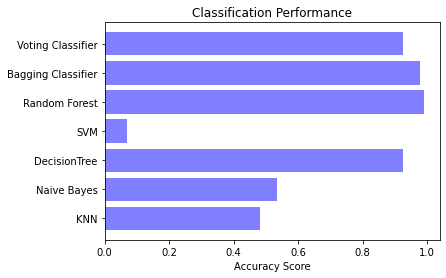

In [41]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

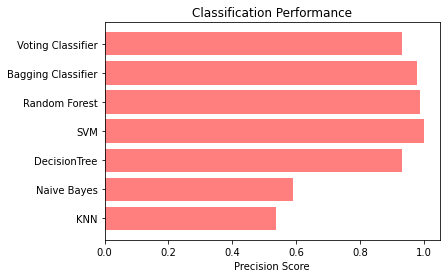

In [42]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

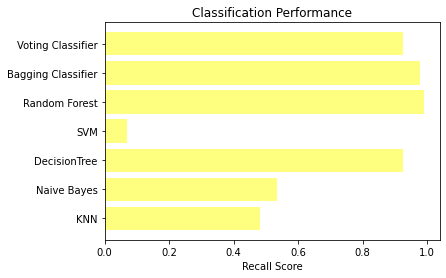

In [43]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

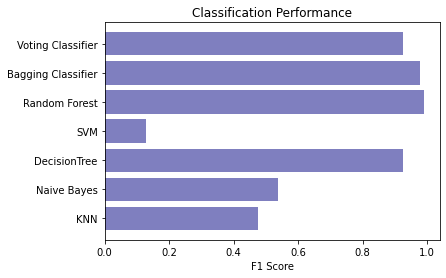

In [44]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# AUC

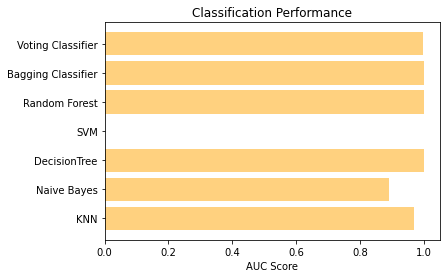

In [45]:
plt2.barh(y_pos, auc, align='center', alpha=0.5,color='orange')
plt2.yticks(y_pos, classifier)
plt2.xlabel('AUC Score')
plt2.title('Classification Performance')
plt2.show()

# MAE

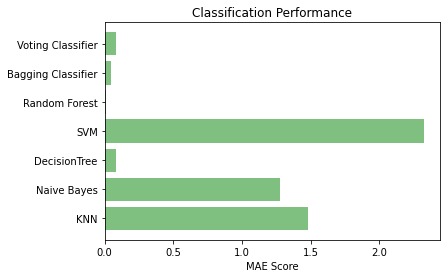

In [46]:
plt2.barh(y_pos, mae, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MAE Score')
plt2.title('Classification Performance')
plt2.show()